In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
cars_df = pd.read_csv('car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
print("There are no missing values in this dataset because .info() displays a non-null count. There are 205 total entries and each entry has 205 non-null entries, meaning all the data is listed.")

There are no missing values in this dataset because .info() displays a non-null count. There are 205 total entries and each entry has 205 non-null entries, meaning all the data is listed.


In [7]:
print(f"The unique companies in our dataset are: \n {cars_df["CarName"].str.lower().str.split().str[0].unique()} ")

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo'] 


In [8]:
cars_df["car_company"] = cars_df["CarName"].str.lower().str.split().str[0].replace("maxda", "mazda").replace("porcshce","porsche").replace("toyouta","toyota").replace("vokswagen","volkswagen").replace("vw","volkswagen")
print(f"The unique companies in our dataset are: \n {cars_df["car_company"].unique()} ")

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 


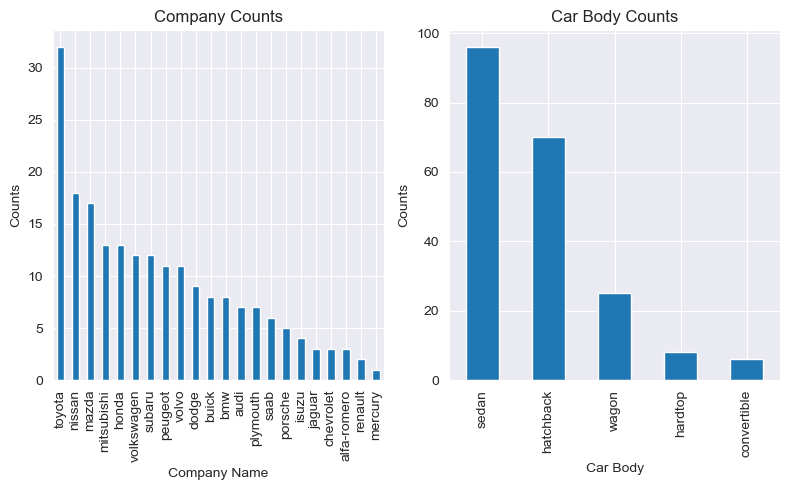

From the Company Counts table, we can conclude that Toyota makes the most unique types of cars. Mercury produces the least amount of cars.
From the Car Body Counts table, sedans and hatchbacks are the most produced car types. Hardtops and convertibles are the least produced car types.


In [9]:
company_counts = cars_df['car_company'].value_counts()
carbody_counts = cars_df['carbody'].value_counts()

fig, axes = plt.subplots(1, 2)

company_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Company Counts')
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=90)

carbody_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Car Body Counts')
axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Counts')


# Layout adjustment
plt.tight_layout()
plt.show()
print("From the Company Counts table, we can conclude that Toyota makes the most unique types of cars. Mercury produces the least amount of cars.")
print("From the Car Body Counts table, sedans and hatchbacks are the most produced car types. Hardtops and convertibles are the least produced car types.")

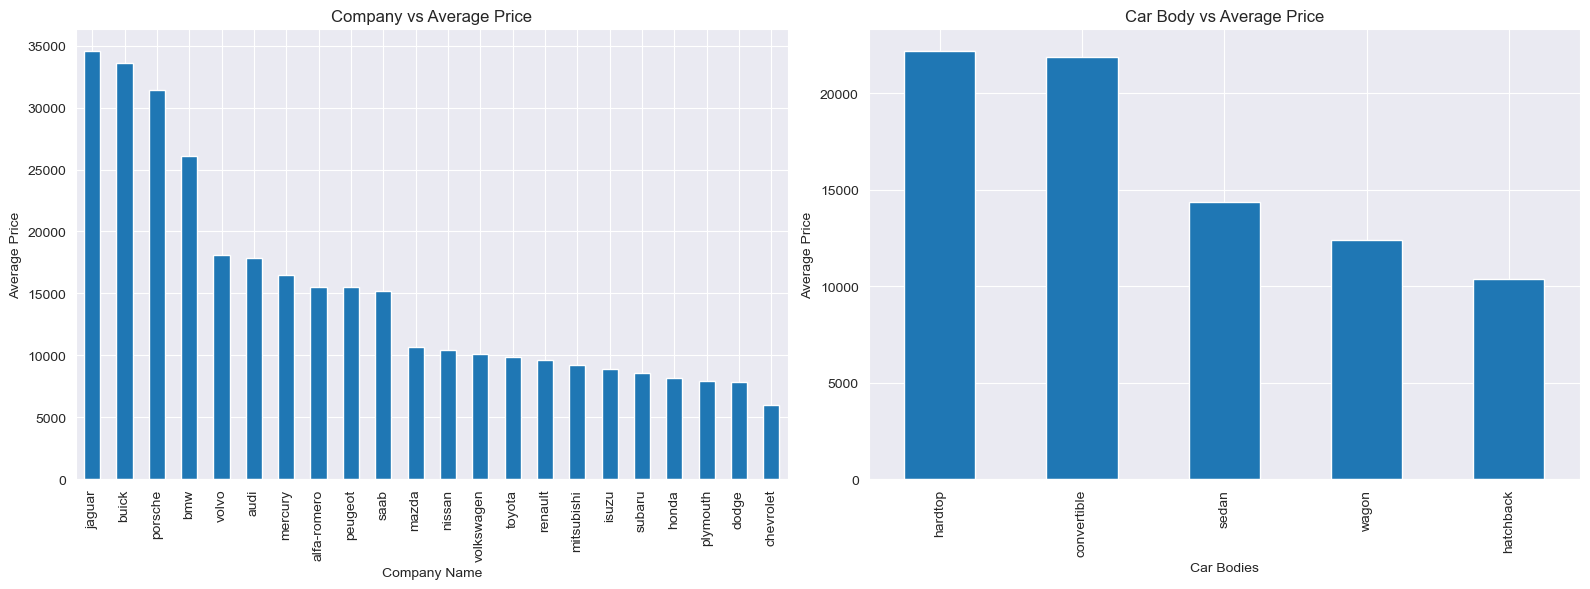

The Company vs. Average Price indicates that Jaguar produces the most expensive cars on average, while Chevrolet produces the least expensive cars.
The Car Body vs. Average price indicates that hardtops are the most expensive types of vehicles. Hatchbacks are the least expensive vehicles.


In [10]:
company_prices = cars_df.groupby('car_company')['price'].mean().sort_values(ascending=False)
carbody_prices = cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16,6)) 

company_prices.plot(kind='bar', ax=axes[0])
axes[0].set_title('Company vs Average Price')
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Average Price')

carbody_prices.plot(kind='bar', ax=axes[1])
axes[1].set_title('Car Body vs Average Price')
axes[1].set_xlabel('Car Bodies')
axes[1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

print("The Company vs. Average Price indicates that Jaguar produces the most expensive cars on average, while Chevrolet produces the least expensive cars.")
print("The Car Body vs. Average price indicates that hardtops are the most expensive types of vehicles. Hatchbacks are the least expensive vehicles.")

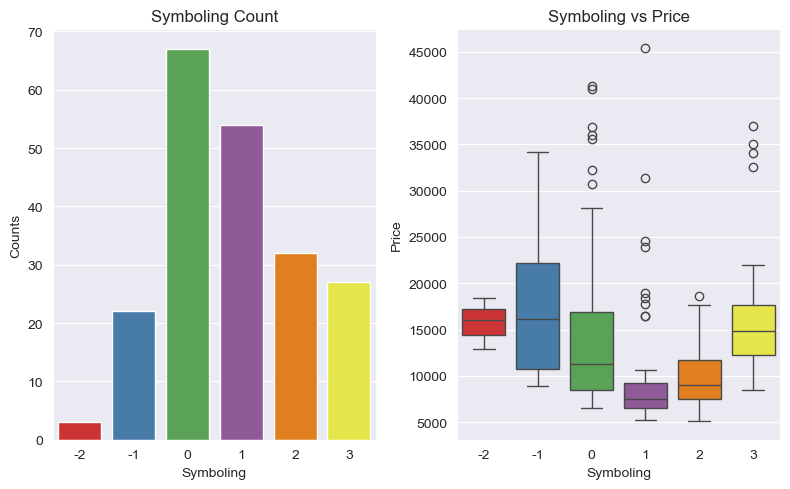

In [11]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='symboling', data=cars_df, hue='symboling', palette='Set1', ax=axes[0])
axes[0].legend([], [], frameon=False)  
axes[0].set_title('Symboling Count')
axes[0].set_xlabel('Symboling')
axes[0].set_ylabel('Counts')

sns.boxplot(x='symboling', y='price', hue='symboling', data=cars_df, palette='Set1', dodge=False, ax=axes[1])
axes[1].legend([], [], frameon=False)  
axes[1].set_title('Symboling vs Price')
axes[1].set_xlabel('Symboling')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [12]:
print("The symboling of a car is its risk factor. the lower the number, the more safe it is considered")
print("By looking at the Symboling Count graph, we can conclude that most car companies produce cars that are on a zero of the symbolling scale. The -2 symbolling cars are produced the least.")
print("The Symboling vs Price graph tells us that cars with a 0 or a 1 risk factor are relatively cheap to produce, but do have some expensive outliers.")

The symboling of a car is its risk factor. the lower the number, the more safe it is considered
By looking at the Symboling Count graph, we can conclude that most car companies produce cars that are on a zero of the symbolling scale. The -2 symbolling cars are produced the least.
The Symboling vs Price graph tells us that cars with a 0 or a 1 risk factor are relatively cheap to produce, but do have some expensive outliers.


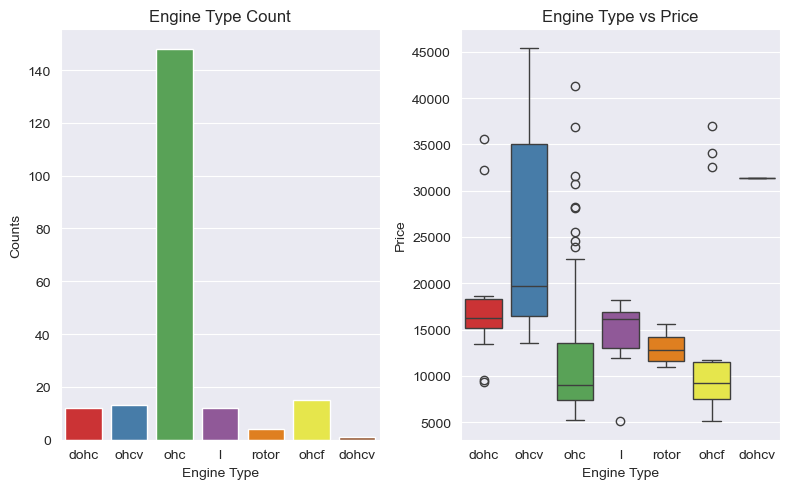

Based on Engine Type Count, ohc engines are produced the most, while dohcv engines are produced the least.
Based on Engine Type vs Price, ohcv engines have the biggest range in price.


In [13]:
engine_counts = cars_df['enginetype'].value_counts()
fig, axes = plt.subplots(1, 2)

sns.countplot(x='enginetype', data=cars_df, hue = 'enginetype',palette='Set1', ax=axes[0])
axes[0].set_title('Engine Type Count')
axes[0].set_xlabel('Engine Type')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=0)


sns.boxplot(x='enginetype', y='price', data=cars_df, hue = 'enginetype',palette='Set1', ax=axes[1])
axes[1].set_title('Engine Type vs Price')
axes[1].set_xlabel('Engine Type')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()
print("Based on Engine Type Count, ohc engines are produced the most, while dohcv engines are produced the least.")
print("Based on Engine Type vs Price, ohcv engines have the biggest range in price.")

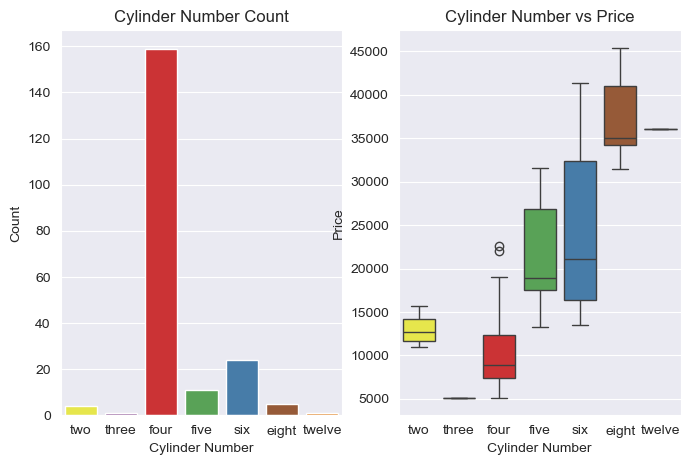

Four cylinder engines are the most produced engines. Three and twelve cylinder engines are produced the least.
Six cylinder engines have the biggest range in prices.


In [14]:
cylinder_counts = cars_df['cylindernumber'].value_counts()
cylinder_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']

fig, axes = plt.subplots(1, 2)

sns.countplot(x='cylindernumber', data=cars_df, order=cylinder_order,hue = 'cylindernumber', palette='Set1', ax=axes[0])
axes[0].set_title('Cylinder Number Count')
axes[0].set_xlabel('Cylinder Number')
axes[0].set_ylabel('Count')

sns.boxplot(x='cylindernumber', y='price', data=cars_df, hue = 'cylindernumber', order=cylinder_order, palette='Set1', dodge=False, ax=axes[1])
axes[1].legend([], [], frameon=False) 
axes[1].set_title('Cylinder Number vs Price')
axes[1].set_xlabel('Cylinder Number')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=0)

plt.show()

print("Four cylinder engines are the most produced engines. Three and twelve cylinder engines are produced the least.")
print("Six cylinder engines have the biggest range in prices.")

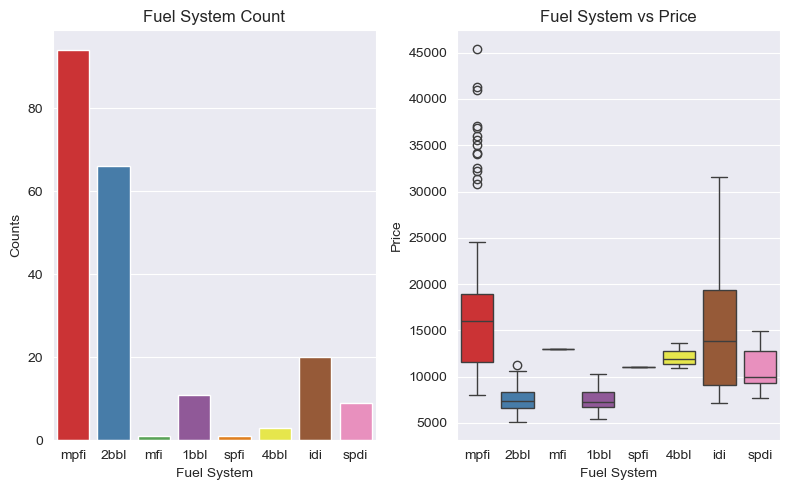

mpfi fuel systems are the most commonly produced, but also have a very wide range. mfi and spfi Fuel systems have the least production amount and price variation.


In [15]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='fuelsystem', data=cars_df, hue='fuelsystem', palette='Set1', ax=axes[0])
axes[0].set_title('Fuel System Count')
axes[0].set_xlabel('Fuel System')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)

sns.boxplot(x='fuelsystem', y='price', data=cars_df, hue='fuelsystem', palette='Set1', ax=axes[1])
axes[1].set_title('Fuel System vs Price')
axes[1].set_xlabel('Fuel System')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

print("mpfi fuel systems are the most commonly produced, but also have a very wide range. mfi and spfi Fuel systems have the least production amount and price variation.")

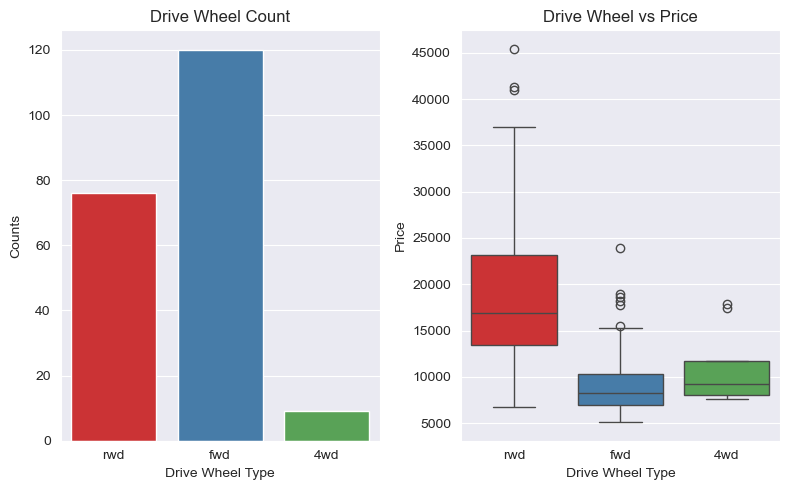

fwd is made the most. 4wd is made the least. The biggest range of prices is from the rwd.


In [16]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='drivewheel', data=cars_df, hue='drivewheel', palette='Set1', ax=axes[0])
axes[0].set_title('Drive Wheel Count')
axes[0].set_xlabel('Drive Wheel Type')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)  
sns.boxplot(x='drivewheel', y='price', data=cars_df, hue='drivewheel', palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('Drive Wheel vs Price')
axes[1].set_xlabel('Drive Wheel Type')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

print("fwd is made the most. 4wd is made the least. The biggest range of prices is from the rwd.")

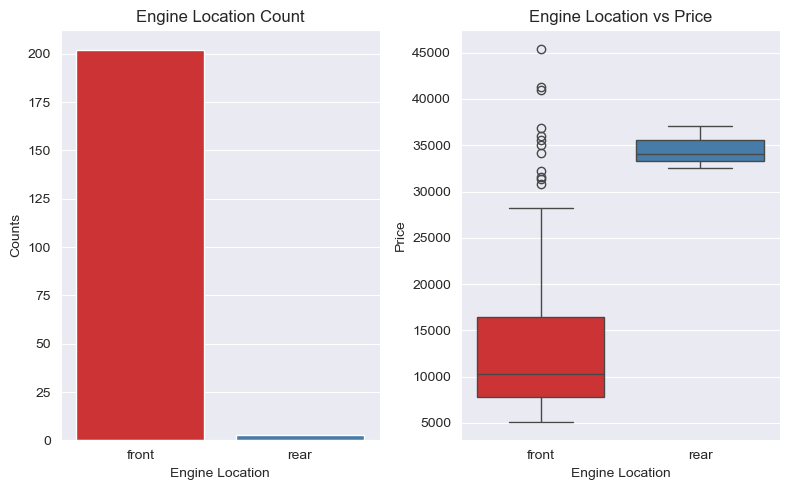

Engines are usually located in the front, but also have the biggest range in price. Rear engines are more rare with a smaller (but pricier) range.


In [17]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='enginelocation', data=cars_df, hue='enginelocation', palette='Set1', ax=axes[0])
axes[0].set_title('Engine Location Count')
axes[0].set_xlabel('Engine Location')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)  # Remove legend

sns.boxplot(x='enginelocation', y='price', data=cars_df, hue='enginelocation', palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('Engine Location vs Price')
axes[1].set_xlabel('Engine Location')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

print("Engines are usually located in the front, but also have the biggest range in price. Rear engines are more rare with a smaller (but pricier) range.")

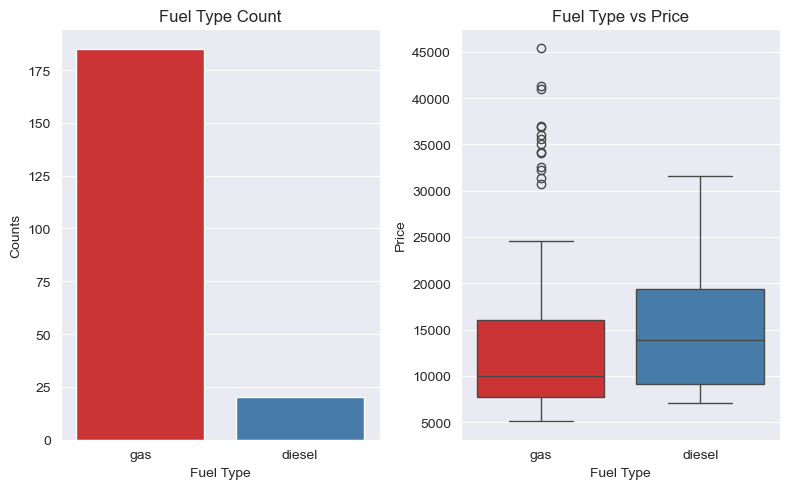

In [18]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='fueltype', data=cars_df, hue='fueltype', palette='Set1', ax=axes[0])
axes[0].set_title('Fuel Type Count')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)

sns.boxplot(x='fueltype', y='price', data=cars_df, hue='fueltype', palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('Fuel Type vs Price')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

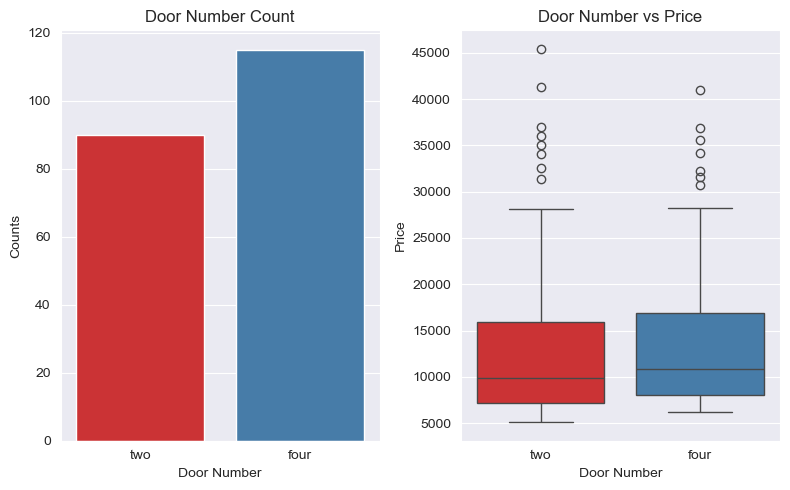

four door cars are slightly more popular than two door cars. The four door car price is a slightly smaller range.


In [19]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='doornumber', data=cars_df, hue='doornumber', palette='Set1', ax=axes[0])
axes[0].set_title('Door Number Count')
axes[0].set_xlabel('Door Number')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)

sns.boxplot(x='doornumber', y='price', data=cars_df, hue='doornumber', palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('Door Number vs Price')
axes[1].set_xlabel('Door Number')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()
print("four door cars are slightly more popular than two door cars. The four door car price is a slightly smaller range.")

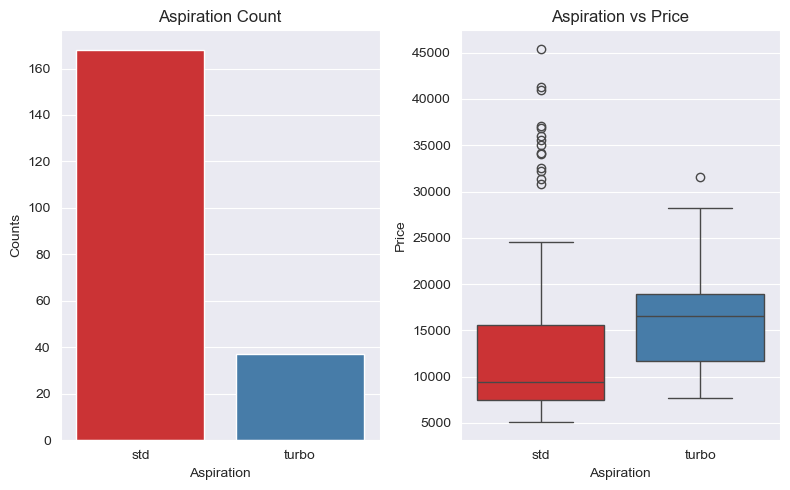

std car aspirations are the most produced types, but they also have a bigger range.


In [20]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='aspiration', data=cars_df, hue='aspiration', palette='Set1', ax=axes[0])
axes[0].set_title('Aspiration Count')
axes[0].set_xlabel('Aspiration')
axes[0].set_ylabel('Counts')
axes[0].legend([], [], frameon=False)

sns.boxplot(x='aspiration', y='price', data=cars_df, hue='aspiration', palette='Set1', dodge=False, ax=axes[1])
axes[1].set_title('Aspiration vs Price')
axes[1].set_xlabel('Aspiration')
axes[1].set_ylabel('Price')
axes[1].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

print("std car aspirations are the most produced types, but they also have a bigger range.")

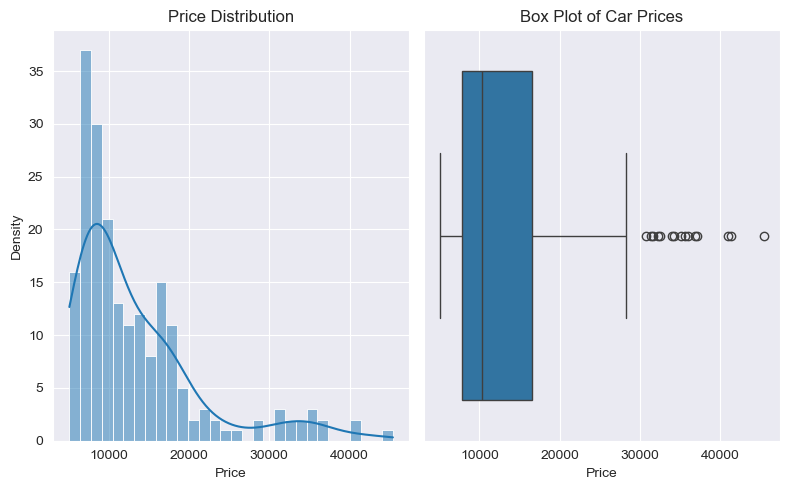

Most cars are made with a lower price range. The small IQR of the boxplot shows that most cars are priced similarly, with the potential of some very expensive cars.


In [21]:
fig, axes = plt.subplots(1, 2)

sns.histplot(cars_df['price'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_title('Box Plot of Car Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("Most cars are made with a lower price range. The small IQR of the boxplot shows that most cars are priced similarly, with the potential of some very expensive cars.")

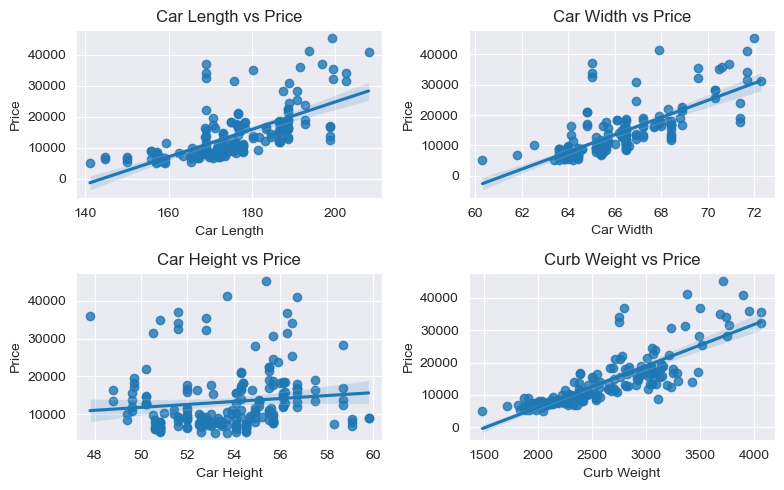

Car Length vs Price shows that there is a positive trend meaning price generally increases with car length.
Car Wength vs Price shows that there is a clearer positive trend meaning price generally increases with car width.
Car Height vs Price doesn't really show any patterns.
Car Weight vs. Price shows that there is a strong positive trend of car price to the car weight.


In [22]:
fig, axes = plt.subplots(2, 2)
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0])
axes[0, 0].set_title('Car Length vs Price')
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')

sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1])
axes[0, 1].set_title('Car Width vs Price')
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')

sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0])
axes[1, 0].set_title('Car Height vs Price')
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')

sns.regplot(x='curbweight', y='price', data=cars_df, ax=axes[1, 1])
axes[1, 1].set_title('Curb Weight vs Price')
axes[1, 1].set_xlabel('Curb Weight')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()
print("Car Length vs Price shows that there is a positive trend meaning price generally increases with car length.")
print("Car Wength vs Price shows that there is a clearer positive trend meaning price generally increases with car width.")
print("Car Height vs Price doesn't really show any patterns.")
print("Car Weight vs. Price shows that there is a strong positive trend of car price to the car weight.")

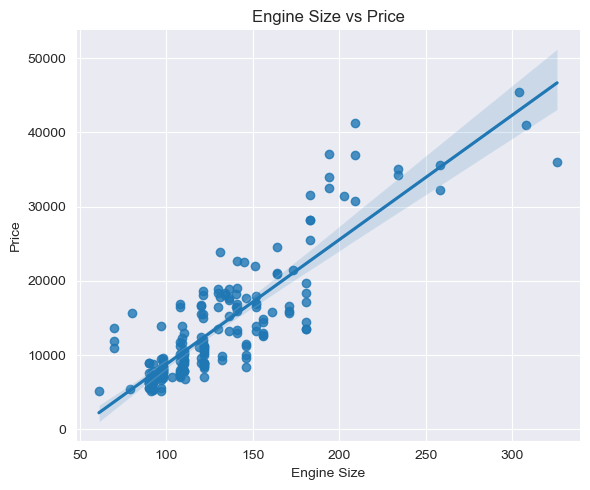

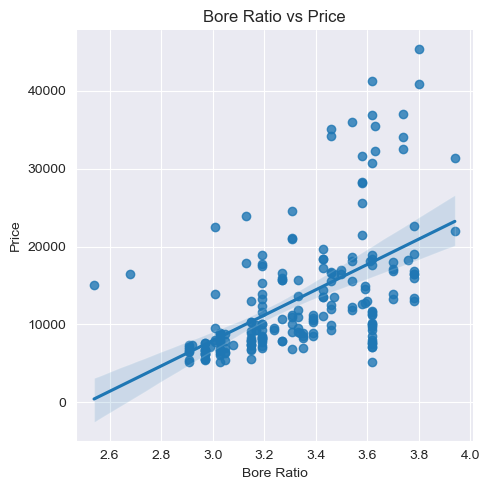

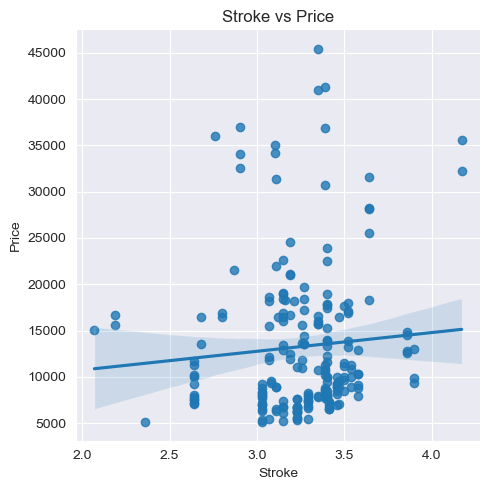

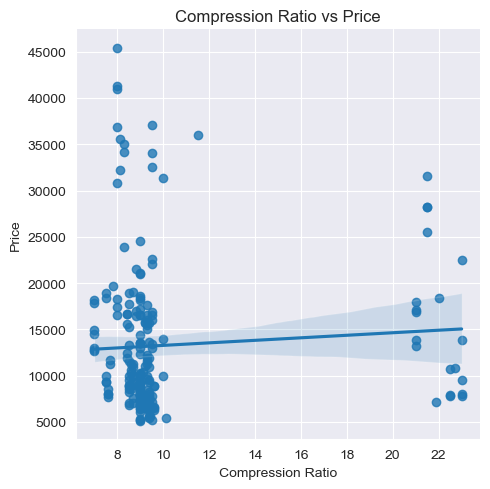

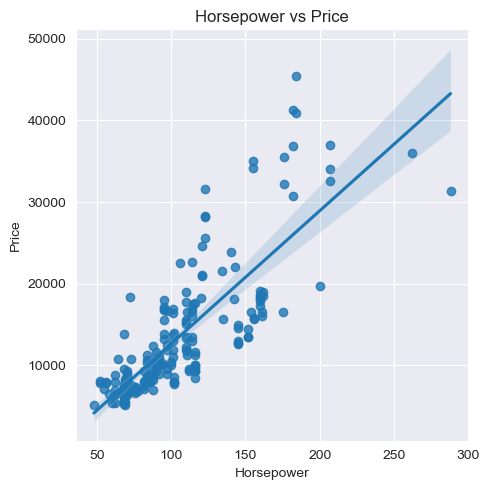

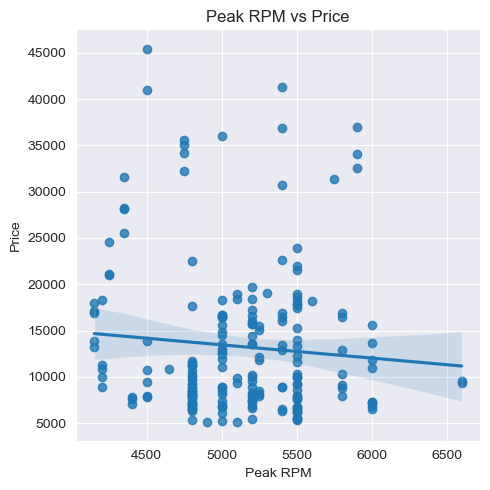

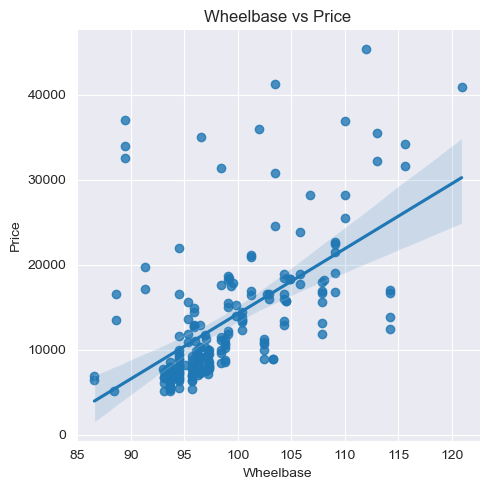

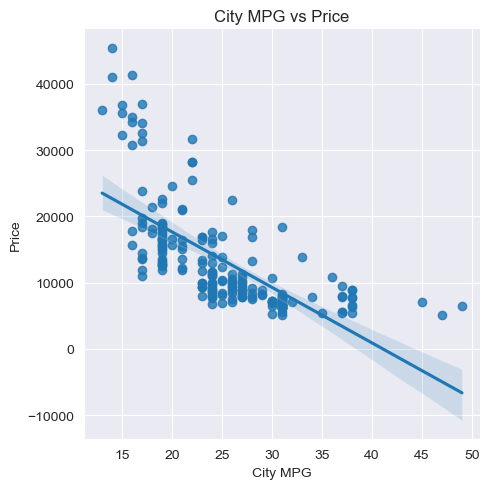

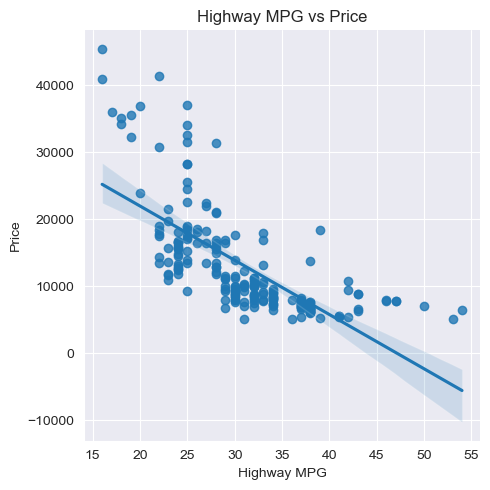

Engine Size vs Price: Strong positive correlation with price which means they both increase together.
Bore Ratio vs Price: Somewhat positive correlation with price. There is a general trend that they increase together.
Stroke vs Price: There is not much of a pattern to see.
Compression Ratio vs Price: This graph doesn't have many points in the middle.
Horsepower vs Price: Strong positive correlation with price.
Peak RPM vs Price: There is no clear pattern with this graph.
Wheelbase vs Price: There is a positive correlation with price.
City MPG vs Price: There is a negative correlation with price.
Highway MPG vs Price: There is a slight negative correlation with price.


In [23]:
sns.lmplot(x='enginesize', y='price', data=cars_df, height=5, aspect=1.2)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='boreratio', y='price', data=cars_df)
plt.title('Bore Ratio vs Price')
plt.xlabel('Bore Ratio')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='stroke', y='price', data=cars_df)
plt.title('Stroke vs Price')
plt.xlabel('Stroke')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='compressionratio', y='price', data=cars_df)
plt.title('Compression Ratio vs Price')
plt.xlabel('Compression Ratio')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='horsepower', y='price', data=cars_df)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='peakrpm', y='price', data=cars_df)
plt.title('Peak RPM vs Price')
plt.xlabel('Peak RPM')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='wheelbase', y='price', data=cars_df)
plt.title('Wheelbase vs Price')
plt.xlabel('Wheelbase')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='citympg', y='price', data=cars_df)
plt.title('City MPG vs Price')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

sns.lmplot(x='highwaympg', y='price', data=cars_df)
plt.title('Highway MPG vs Price')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

print("Engine Size vs Price: Strong positive correlation with price which means they both increase together.")
print("Bore Ratio vs Price: Somewhat positive correlation with price. There is a general trend that they increase together.")
print("Stroke vs Price: There is not much of a pattern to see.")
print("Compression Ratio vs Price: This graph doesn't have many points in the middle.")
print("Horsepower vs Price: Strong positive correlation with price.")
print("Peak RPM vs Price: There is no clear pattern with this graph.")
print("Wheelbase vs Price: There is a positive correlation with price.")
print("City MPG vs Price: There is a negative correlation with price.")
print("Highway MPG vs Price: There is a slight negative correlation with price.")

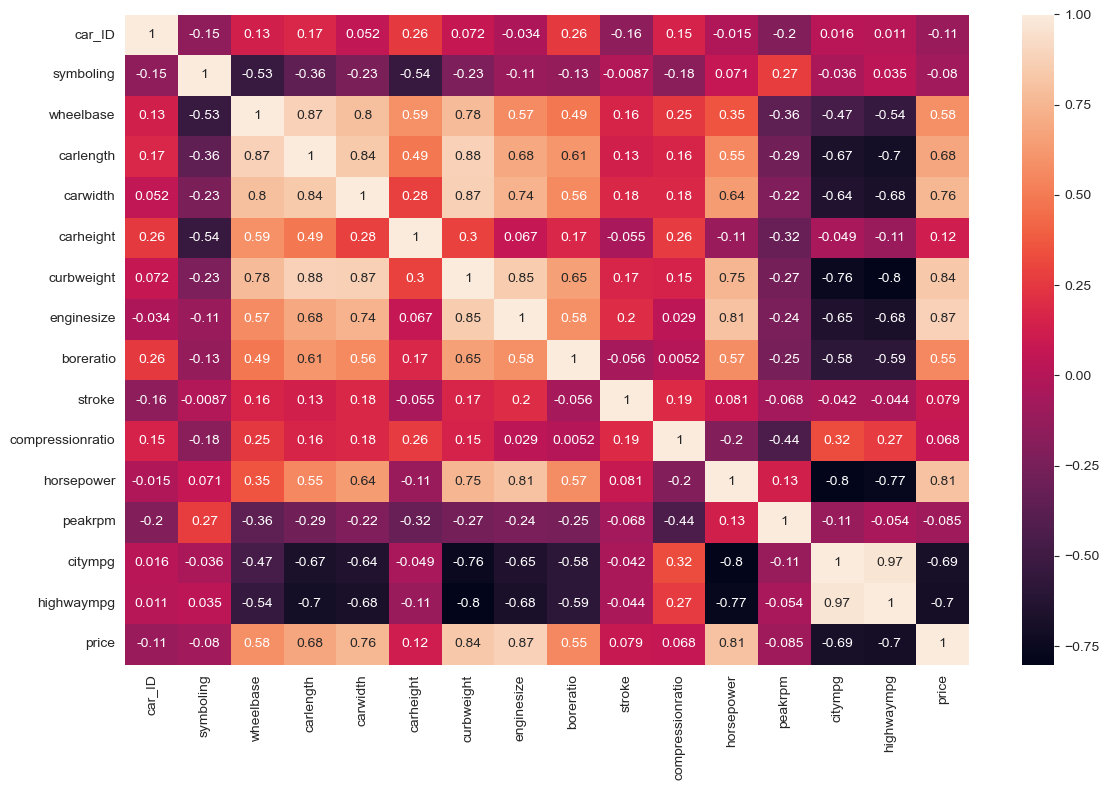

Any number above .7 indicates a noticable trend. Horsepower, curbweight, carwidth, and engine size are all strongly correlated with price.
Citympg and highwaympg are strongly correlated. Horsepower and enginesize are also correlated. Cubweight and Enginesize are correlated as well. These can be used for data reduction.


In [24]:
corr_matrix = cars_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)

plt.tight_layout()
plt.show()

print("Any number above .7 indicates a noticable trend. Horsepower, curbweight, carwidth, and engine size are all strongly correlated with price.")
print("Citympg and highwaympg are strongly correlated. Horsepower and enginesize are also correlated. Cubweight and Enginesize are correlated as well. These can be used for data reduction.")

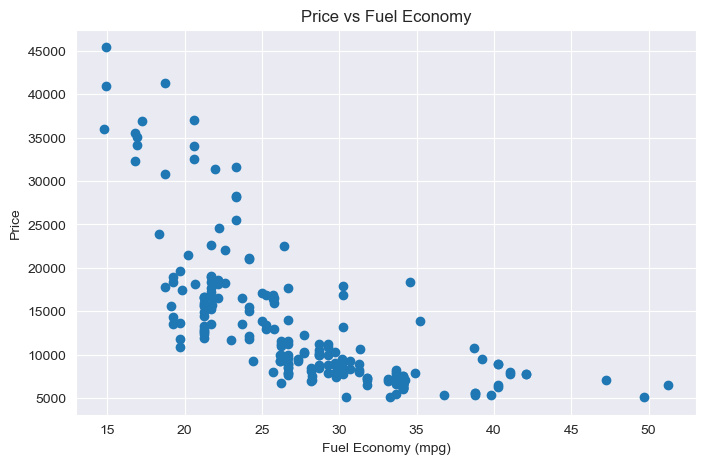

Horsepower, enginesize, curbweight, carwidth, and fuel_economy seem to be the best indicators of predicting the price.


In [25]:
cars_df['fuel_economy'] = 0.55 * cars_df['citympg'] + 0.45 * cars_df['highwaympg']
#I looked up the standard way of converting to MPG

plt.scatter(cars_df['fuel_economy'], cars_df['price'])
plt.title('Price vs Fuel Economy')
plt.xlabel('Fuel Economy (mpg)')
plt.ylabel('Price')
plt.show()

print("Horsepower, enginesize, curbweight, carwidth, and fuel_economy seem to be the best indicators of predicting the price.")

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

x = cars_df[['horsepower', 'enginesize', 'curbweight', 'carwidth', 'fuel_economy']]
y = cars_df['price']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

R² Score: 0.8061


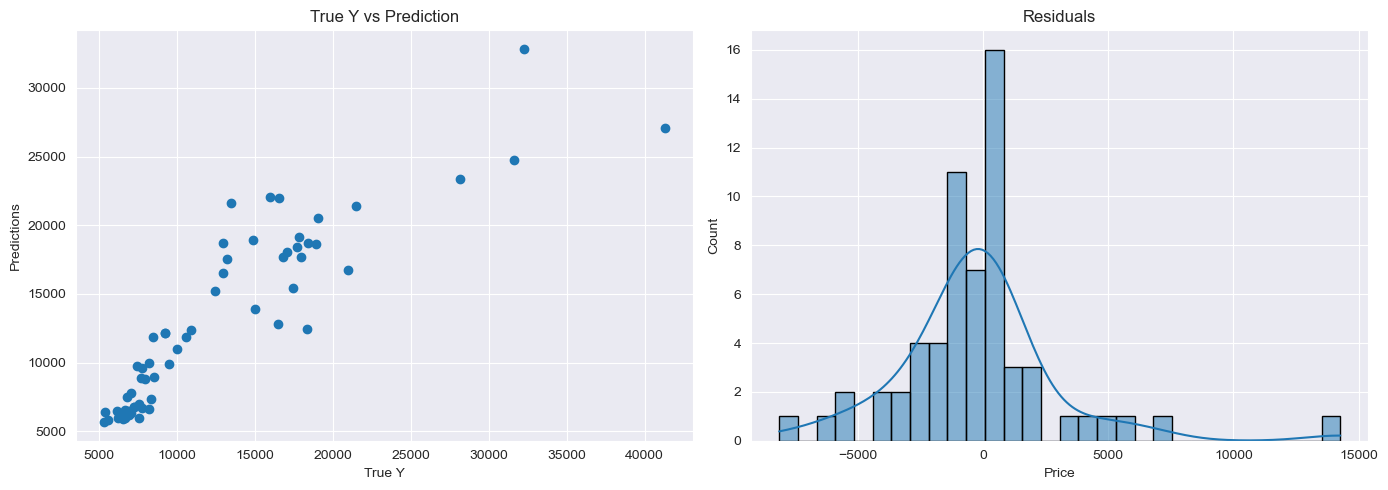

In [40]:
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

residuals = y_test - predictions
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2:.4f}')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_test, predictions)
axes[0].set_xlabel('True Y')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True Y vs Prediction')

sns.histplot(residuals, bins=30, kde=True, ax=axes[1], edgecolor='black')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Count')
axes[1].set_title('Residuals')

plt.tight_layout()
plt.show()

In [32]:
coefficients_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': lm.coef_
})

print('The coefficients mean that for each singular unit increase of the item, the price of the car changes by that amount.')

The coefficients mean that for each singular unit increase of the item, the price of the car changes by that amount.


In [42]:
print("The most significant variables for predicting the price of a car are 'horsepower', 'enginesize', 'curbweight', 'carwidth', and 'fuel_economy' based on the r^2 score average of about 84%") 

The most significant variables for predicting the price of a car are 'horsepower', 'enginesize', 'curbweight', 'carwidth', and 'fuel_economy' based on the r^2 score average of about 84%
